# Link to The Github Repository for the Assignment: https://github.com/sarabjot03/Algerian_forst_fire

## Neural Networks and Deep Learning Assignment

### 1. Data Cleaning and Preprocessing

#### IMPORTING NECESSARY LIBRARIES

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


#### LOADING THE DATASET

In [67]:
# Loading the Algerian forest fires dataset
df=pd.read_csv("/Users/sarabjotsingh/Downloads/Algerian_forest_fires_cleaned.csv")

#### EXPLORING THE DATASET

In [68]:
# Displaying basic information about the dataset
print("\nDataset Info:")
print("-----------------------------------------")
print(df.info())


Dataset Info:
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


In [126]:
# Displaying the first 20 rows of the dataset

print("First 20 Rows of the Dataset:")
df.head()

First 20 Rows of the Dataset:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [128]:
# Display summary statistics of the dataset

print("\nSummary Statistics of the dataset:")
print("--"*200)
df.describe()


Summary Statistics of the dataset:
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [71]:
# Check for missing values in the dataset

print("\nMissing Values:")
print("------------------------------------")
df.isnull().sum()


Missing Values:
------------------------------------


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

### Handling the errors effectively

In [72]:
# Checking unique classes in the dataset

print("Unique Classes in the Dataset:")
print(df['Classes'].unique())

Unique Classes in the Dataset:
['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [73]:
# Striping extra spaces from the 'Classes' column
df['Classes']=df['Classes'].str.strip()

# printing the unique values in the 'Classes' column
print(df['Classes'].unique())

['not fire' 'fire']


In [74]:
# Mapping 'Classes' to numerical values

# 'fire' is mapped to 1 and 'not fire' is mapped to 0
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})

In [75]:
# Printing the unique values in the 'Classes' column after mapping

print("Unique Classes After Mapping:")
print(df['Classes'].unique())

Unique Classes After Mapping:
[0 1]


In [76]:
# printing the unique values in the 'Region' column
print(df['Region'].unique())

[0 1]


In [77]:
# Showing the count of occurrences for each unique value in the 'Region' column

print("Count of Regions in the Dataset:")
print(df['Region'].value_counts())


Count of Regions in the Dataset:
Region
0    122
1    121
Name: count, dtype: int64


In [78]:
# Displaying the first 5 rows of the dataset after mapping

print("First 5 Rows of the Dataset after mapping:")
df.head()

First 5 Rows of the Dataset after mapping:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [129]:
# Display summary statistics of the dataset after mapping

print("\nSummary Statistics of the dataset after mapping:")
print("--"*200)
df.describe()


Summary Statistics of the dataset after mapping:
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


#### CHECKING OUTLIERS

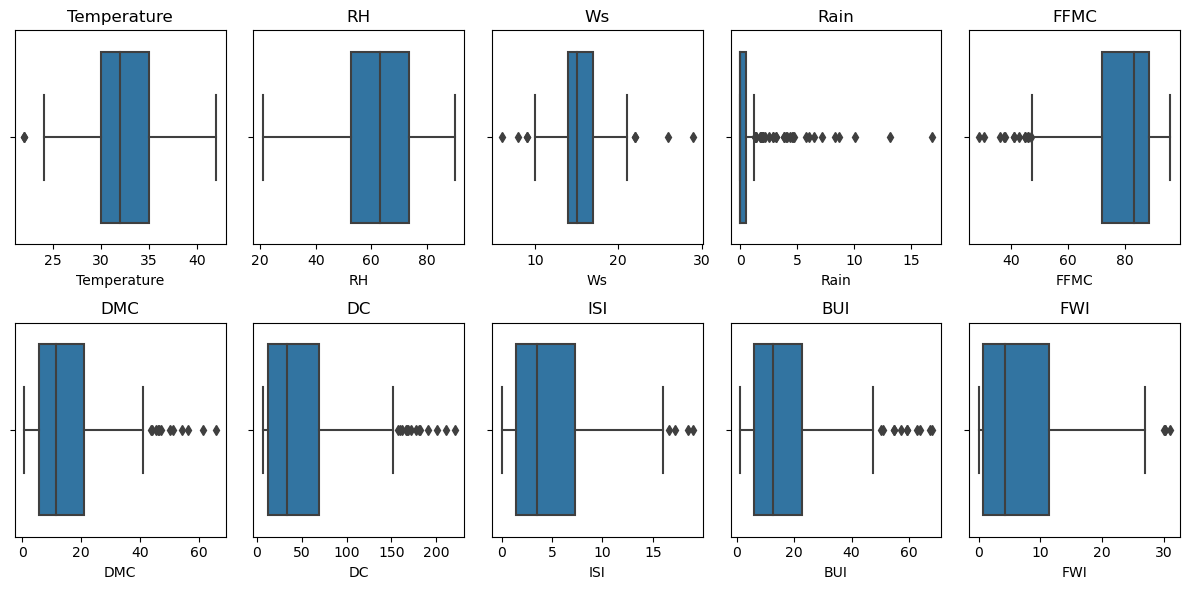

In [80]:
#Setting the size for the plot
plt.figure(figsize=(12, 6))

# Box plot for the given numerical features
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Looping through each numerical feature to create box plots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)     # Create a subplot for each feature
    sns.boxplot(x=df[feature])  #Creating box plot for feature
    plt.title(feature)    # Set the title for the plot

# Adjusting layout to prevent overlap
plt.tight_layout()
#Displaying result
plt.show()

#### CODE FOR HANDLING OUTLIERS

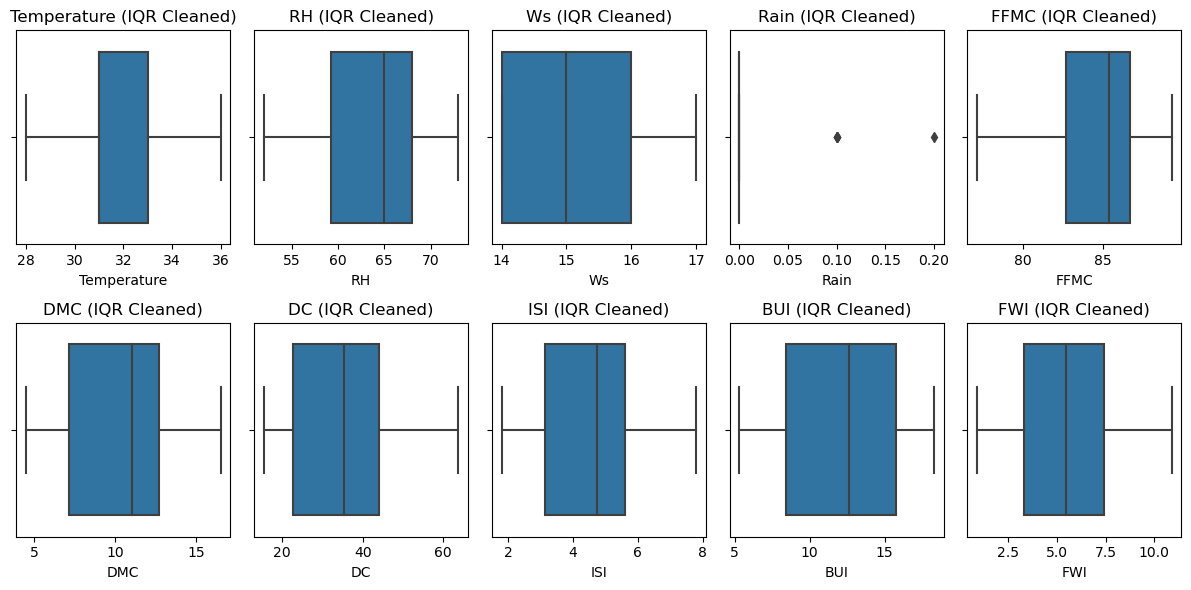

In [81]:
# List of numerical features 
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Handling Outliers Using IQR Method
def handle_outliers_iqr(data):
    # Calculate the first and third quartiles
    Q1 = data.quantile(0.42)
    Q3 = data.quantile(0.58)
    IQR = Q3 - Q1
    # Keeping only those rows that are not outliers
    data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_clean


# Extracting the numerical features from the DataFrame
X = df[numerical_features] 

# Applying IQR Method
X_cleaned_iqr = handle_outliers_iqr(X)

# Box plot to visualize the numerical features after handling outliers with IQR
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=X_cleaned_iqr[feature])
    plt.title(f'{feature} (IQR Cleaned)')

plt.tight_layout()
plt.show()

In [130]:
# Display summary statistics of the dataset after handling outliers

print("\nSummary Statistics of the dataset after handling outliers:")
print("--"*200)

df.describe()


Summary Statistics of the dataset after handling outliers:
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [131]:
# Defining features and target variable
x = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]  
y = df['FWI']  # Target variable

# Split into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)


### FEATURE SELECTION

In [84]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr() 

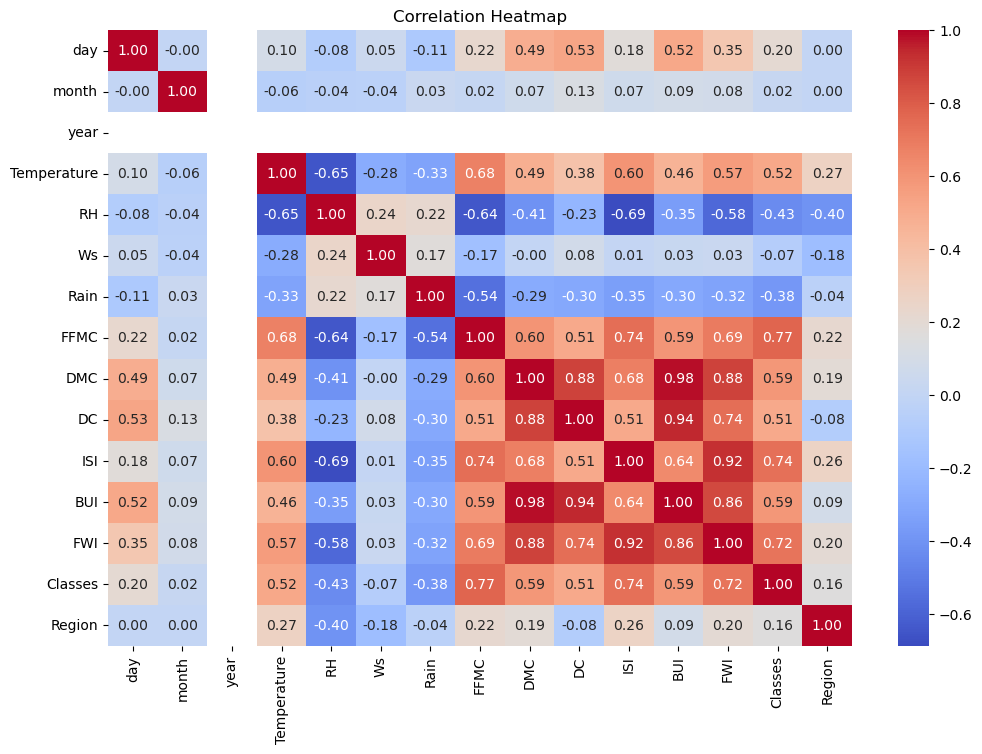

In [85]:
plt.figure(figsize=(12, 8))  
# Creating a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 2. DATA VISUALIZATION AND OBSERVATIONS

### EDA(EXPLORATORY DATA ANALYSIS)

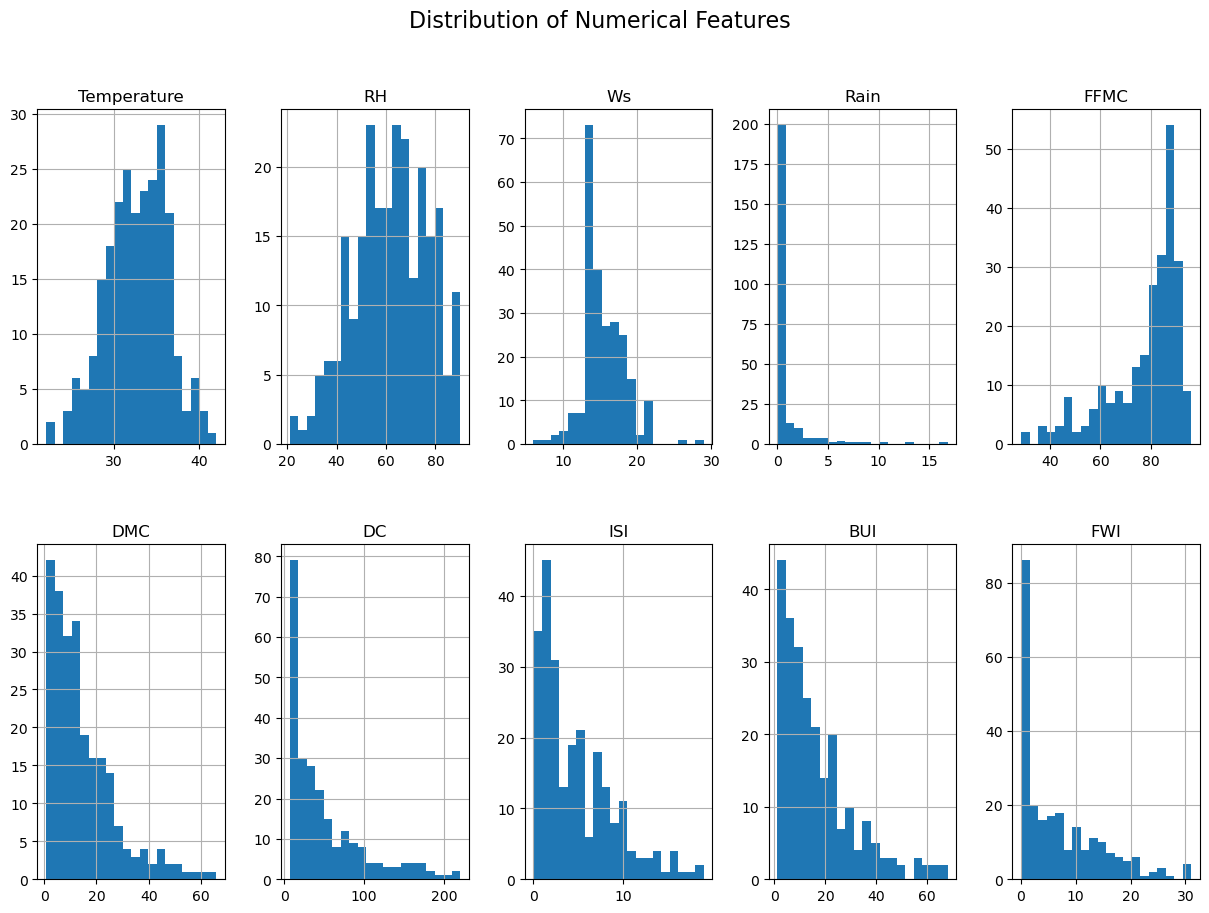

In [86]:
# Histograms for all the numerical features in the dataset
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 5))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


#### Distribution of Numerical Features
##### Temperature: The data is right-skewed, with most temperatures concentrated between 30°C and 35°C.
##### RH (Relative Humidity): The distribution is fairly uniform, with peaks around 50% and 80% RH.
##### Ws (Wind Speed): The majority of the wind speeds are between 5 and 20 km/h, with a right-skewed distribution.
##### Rain: There are very few instances of significant rainfall. Most of the data points have little to no rain.
##### FFMC (Fine Fuel Moisture Code): The distribution is right-skewed, with a large number of instances above 80, indicating dry conditions.
##### DMC (Duff Moisture Code): The distribution is also right-skewed, with most values below 20, implying less moisture.
##### DC (Drought Code): A right-skewed distribution, with a significant number of instances between 100 and 150.
##### ISI (Initial Spread Index): Highly skewed with most values concentrated between 0 and 10.
##### BUI (Buildup Index): The majority of values are under 40, indicating that dry conditions dominate.
##### FWI (Fire Weather Index): Skewed to the right, with most values concentrated between 0 and 10.


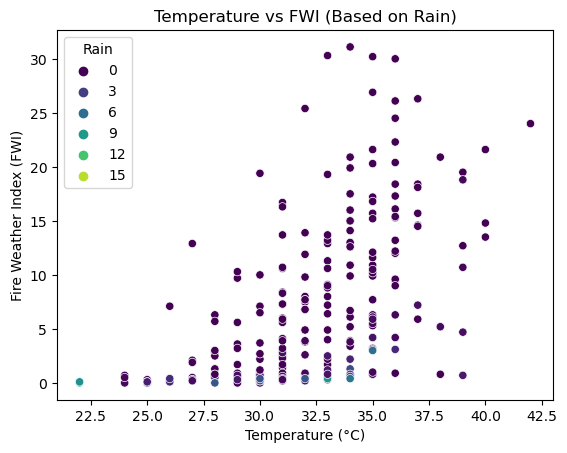

In [87]:
# Scatter plot between Temperature and FWI based on Rain
sns.scatterplot(x='Temperature', y='FWI', hue='Rain', data=df, palette='viridis')
plt.title('Temperature vs FWI (Based on Rain)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()



#### Line Plot: Trend of FWI and ISI Over Time (Index)
##### Both FWI and ISI exhibit a cyclical trend, with simultaneous spikes and drops.
##### FWI tends to have higher peaks than ISI, indicating that FWI has more extreme values during certain periods.
##### The overall pattern suggests that the initial fire spread index (ISI) follows the fire weather index (FWI) trends closely, but FWI generally amplifies the severity of fire conditions.
##### Both indices show high variability over the index range, indicating fluctuating fire risk conditions during the observed time frame.

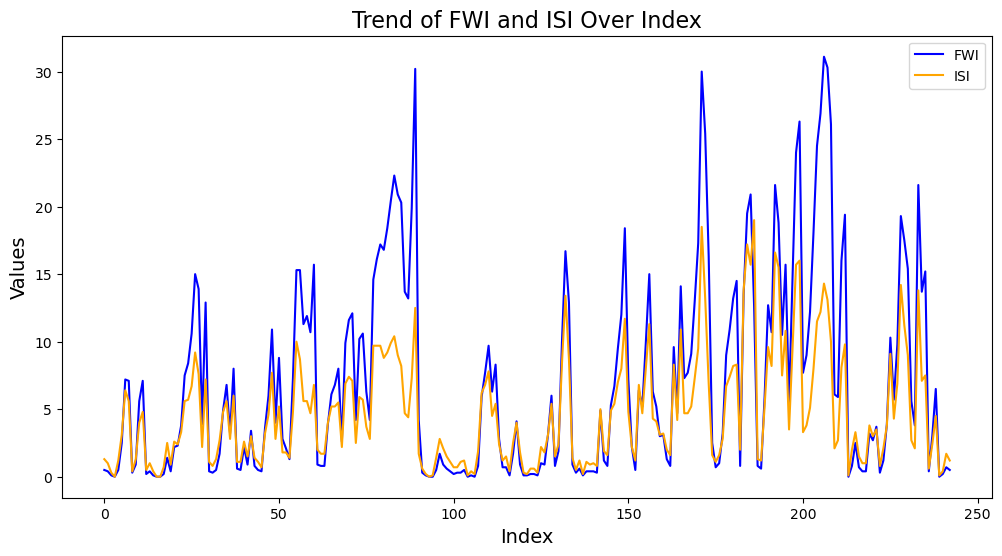

In [88]:
# Line plot for FWI and Rain over an index (assumed to be time series)
plt.figure(figsize=(12, 6))

# Plot FWI
plt.plot(df['FWI'], label='FWI', color='blue')

# Plot Rain
plt.plot(df['ISI'], label='ISI', color='orange')

# Enhance the plot with titles and labels
plt.title('Trend of FWI and ISI Over Index', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()


#### Line Plot: Trend of FWI and ISI Over Time (Index)
##### Both FWI and ISI exhibit a cyclical trend, with simultaneous spikes and drops.
##### FWI tends to have higher peaks than ISI, indicating that FWI has more extreme values during certain periods.
##### The overall pattern suggests that the initial fire spread index (ISI) follows the fire weather index (FWI) trends closely, but FWI generally amplifies the severity of fire conditions.
##### Both indices show high variability over the index range, indicating fluctuating fire risk conditions during the observed time frame.

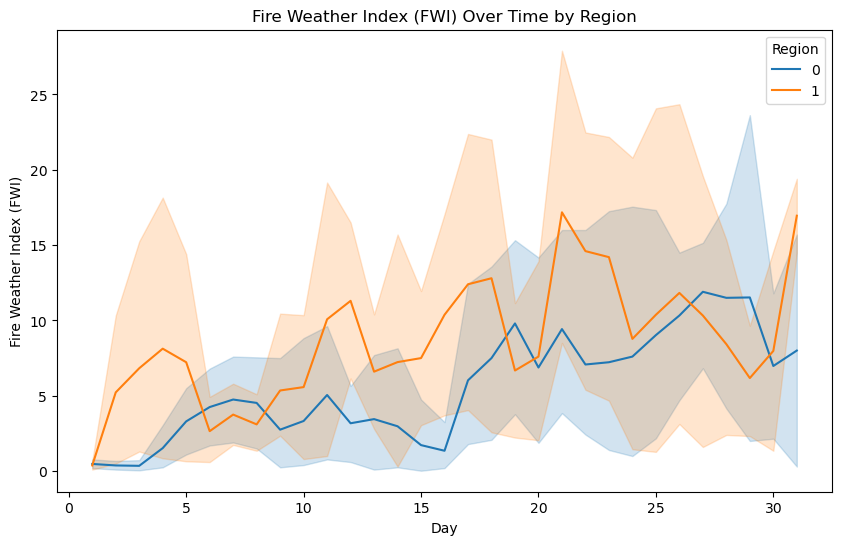

In [89]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='FWI', hue='Region', data=df)
plt.title('Fire Weather Index (FWI) Over Time by Region')
plt.xlabel('Day')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()

#### Fire Weather Index (FWI) Over Time by Region
##### Trends in FWI: The line plot illustrates the variation in the Fire Weather Index (FWI) over a specified time period for two different regions (Region 0 and Region 1).
##### Regional Differences: There are notable differences in FWI trends between the two regions. Region 1 tends to have a higher FWI compared to Region 0, suggesting a greater fire risk.
##### Fluctuations: Both regions show fluctuations in FWI, indicating that external factors such as weather conditions, vegetation, and moisture levels are impacting fire danger. These ##### fluctuations could be further analyzed with respect to specific environmental conditions present during these time periods.
##### Implications for Fire Management: Understanding the FWI trends can assist in strategic planning for fire prevention and control measures in regions identified with higher indices.

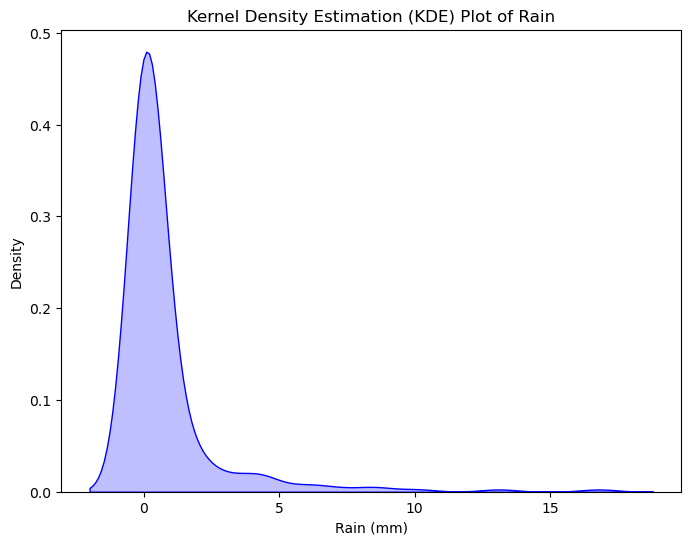

In [90]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Rain'], shade=True, color='blue')
plt.title('Kernel Density Estimation (KDE) Plot of Rain')
plt.xlabel('Rain (mm)')
plt.ylabel('Density')
plt.show()


#### Kernel Density Estimation (KDE) Plot of Rain
##### Rain Distribution: The KDE plot provides a smooth representation of the distribution of rain (measured in mm). The plot shows a strong peak around 0 mm of rain, indicating thatmost da ys experienced little to no rainfall.
##### Rainfall Extremes: The plot tail suggests occasional extreme rainfall events, although these occurrences are relatively rare. The very low density of the curve beyond 10 mm suggests that heavy rain is infrequent, which can have implications for fire risk, as dry conditions are often conducive to wildfires.
##### Understanding Rainfall Patterns: This analysis of rainfall distribution is crucial in understanding moisture availability, which is a key factor in fire behavior. The predominance of low rainfall days can be indicative of prolonged dry spells that increase fire risk.

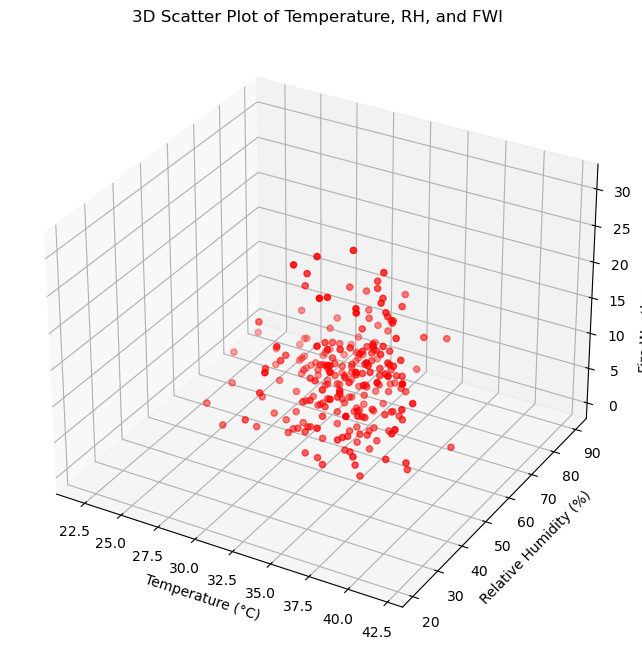

In [91]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Temperature'], df['RH'], df['FWI'], c='r', marker='o')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Relative Humidity (%)')
ax.set_zlabel('Fire Weather Index (FWI)')

plt.title('3D Scatter Plot of Temperature, RH, and FWI')
plt.show()

#### 3D Scatter Plot of Temperature, RH, and FWI
##### Relationship Analysis: The 3D scatter plot illustrates the relationship among temperature, RH, and FWI. Each axis represents a critical variable, providing a comprehensive view of how these factors interact.
##### Temperature and FWI Correlation: There is a visible trend where higher temperatures correlate with increased FWI values. This suggests that as temperature rises, the likelihood of fire danger also increases.
##### Impact of Relative Humidity: The plot also indicates that lower RH is associated with higher FWI, emphasizing that low humidity levels can exacerbate fire risk, especially in hot conditions.
##### Fire Risk Assessment: The interplay between these variables highlights the importance of monitoring both temperature and humidity to predict fire risk effectively. This insight could inform both real-time decision-making and long-term fire management strategies.

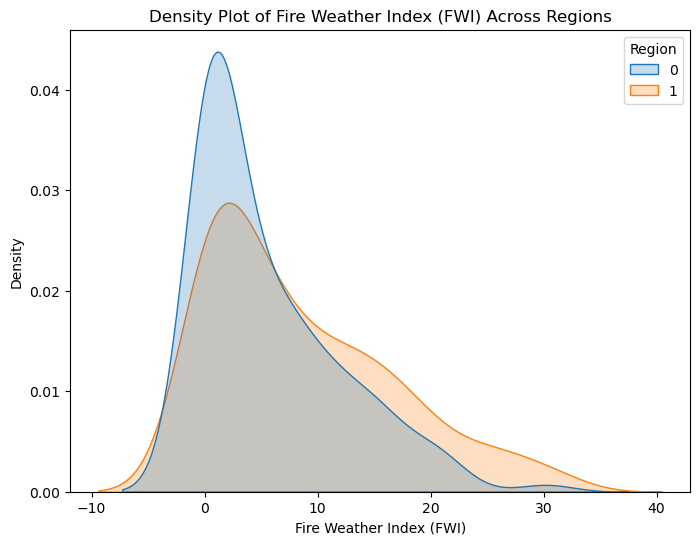

In [92]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="FWI", hue="Region", fill=True)
plt.title('Density Plot of Fire Weather Index (FWI) Across Regions')
plt.xlabel('Fire Weather Index (FWI)')
plt.ylabel('Density')
plt.show()

Fire Risk: Class 1 has a higher and more varied fire risk compared to Class 0.

Management Strategies: Fire management efforts might need to be more intensive and varied in Class 1 to address the higher and more frequent fire risks.

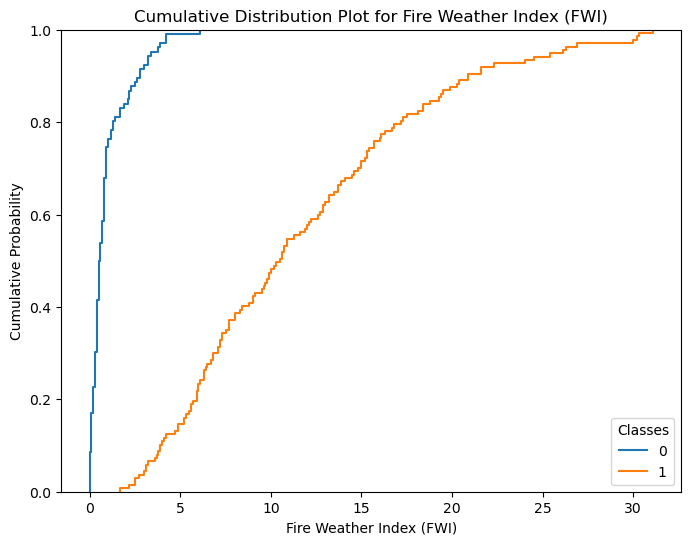

In [93]:
plt.figure(figsize=(8, 6))
sns.ecdfplot(data=df, x="FWI", hue=df['Classes'])
plt.title('Cumulative Distribution Plot for Fire Weather Index (FWI)')
plt.xlabel('Fire Weather Index (FWI)')
plt.ylabel('Cumulative Probability')
plt.show()

## 3. MODEL DEVELOPMENT AND ANALYSIS

In [94]:
# Normalisation

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [95]:
# Save the StandardScaler model as a .pkl file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nModel saved as 'scaler_file.pkl'")


Model saved as 'scaler_file.pkl'


In [132]:
lr=LinearRegression()
# train the model
lr.fit(x_train,y_train)

# Print the coefficients and intercept of the model
print(lr.coef_, lr.intercept_)

# Make predictions on the training and test sets
y_pred_tr_lr=lr.predict(x_train)
y_pred_lr=lr.predict(x_test)

print()
print("----------------------------------------------------------------")
# Evaluate metrics on training data
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_lr))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_lr))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_lr))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_lr)))
print()
print("----------------------------------------------------------------")
# Evaluate metrics on testing data
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_lr))
print("mean_squared_error",mean_squared_error(y_test,y_pred_lr))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

[-0.02836525  0.00459516 -0.01429301  0.04175677 -0.05944347  0.21075541
  0.02569031  1.35309102 -0.02365818] 2.161809044861446

----------------------------------------------------------------
Metrices on train_data
r2_score 0.9904518410411765
mean_squared_error 0.515807227997876
mean_absolute_error 0.47965815679857704
RMSE 0.7181972068992444

----------------------------------------------------------------
Metrices on test_data
r2_score 0.9027397751946374
mean_squared_error 5.713748573576039
mean_absolute_error 0.9500599528078
RMSE 2.390344864988322


In [133]:
# Save the trained Linear Regression model as a .pkl file
with open('linear_regression_model.pkl', 'wb') as linear_regression_model_file:
    pickle.dump(lr, linear_regression_model_file)

print("\nModel saved as 'linear_regression_model.pkl'")


Model saved as 'linear_regression_model.pkl'


### REGULARIZATION MODELS (RIDGE,LASSO AND ELASTIC NET)

In [97]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [98]:
ls=Lasso()
rd=Ridge()
en=ElasticNet()

##### 1.1 RIDGE REGRESSION (L2)

In [99]:
# train the model with ridge
rd.fit(x_train,y_train)

# Print the coefficients and intercept of the model
print(rd.coef_, rd.intercept_)

# Make predictions on the training and test sets
y_pred_tr_rd=rd.predict(x_train)
y_pred_rd=rd.predict(x_test)

print()
print("----------------------------------------------------------------")
# Evaluate metrics on training data
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_rd))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_rd))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_rd))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_rd)))
print()
print("----------------------------------------------------------------")
# Evaluate metrics on testing data
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_rd))
print("mean_squared_error",mean_squared_error(y_test,y_pred_rd))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_rd))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_rd)))

[-0.07119056 -0.10509525 -0.07805974  0.04519824 -0.64403909  1.58444573
  0.46682311  5.13829157  1.79498081] 7.420103092783505

----------------------------------------------------------------
Metrices on train_data
r2_score 0.972931326425548
mean_squared_error 1.6422747875229842
mean_absolute_error 0.6793297885894135
RMSE 1.281512695029973

----------------------------------------------------------------
Metrices on test_data
r2_score 0.9813740484635785
mean_squared_error 0.5645231898376484
mean_absolute_error 0.47690240317232196
RMSE 0.7513475825725723


In [100]:
# Save the trained Ridge model as a .pkl file
with open('ridge_model.pkl', 'wb') as ridge_model_file:
    pickle.dump(rd, ridge_model_file)

print("\nModel saved as 'ridge_model.pkl'")



Model saved as 'ridge_model.pkl'


##### 1.2 LASSO REGRESSION(L1)

In [101]:
# train the ls model
ls.fit(x_train,y_train)

# Print the coefficients and intercept of the model
print(ls.coef_, ls.intercept_)

# Make predictions on the training and test sets
y_pred_tr_ls=ls.predict(x_train)
y_pred_ls=ls.predict(x_test)

print()
print("----------------------------------------------------------------")
# Evaluate metrics on training data
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_ls))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_ls))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_ls))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_ls)))
print()
print("----------------------------------------------------------------")
# Evaluate metrics on testing data
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_ls))
print("mean_squared_error",mean_squared_error(y_test,y_pred_ls))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_ls))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_ls)))

[ 0.         -0.          0.         -0.          0.          1.653321
  0.          4.12303619  1.42846705] 7.420103092783506

----------------------------------------------------------------
Metrices on train_data
r2_score 0.9493233613044427
mean_squared_error 3.0745860456448435
mean_absolute_error 1.2482158555060359
RMSE 1.7534497556659112

----------------------------------------------------------------
Metrices on test_data
r2_score 0.9527917018651334
mean_squared_error 1.4308089977464695
mean_absolute_error 0.9552746314709522
RMSE 1.1961642854334305


In [102]:
# Save the trained Lasso model as a .pkl file
with open('lasso_model.pkl', 'wb') as lasso_model_file:
    pickle.dump(ls, lasso_model_file)

print("\nModel saved as 'lasso_model.pkl'")



Model saved as 'lasso_model.pkl'


##### 1.3 ELASTIC NET

In [103]:
# train the en model
en.fit(x_train,y_train)

print(en.coef_, en.intercept_)
y_pred_tr_en=en.predict(x_train)
y_pred_en=en.predict(x_test)

print()
print("----------------------------------------------------------------")
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_en))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_en))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_en))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_en)))
print()
print("----------------------------------------------------------------")
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_en))
print("mean_squared_error",mean_squared_error(y_test,y_pred_en))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_en))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_en)))

[ 0.14824235 -0.58630784  0.         -0.          0.42766544  1.46348641
  0.79341387  2.40031387  1.29192521] 7.420103092783506

----------------------------------------------------------------
Metrices on train_data
r2_score 0.9092615356500454
mean_squared_error 5.505164183631429
mean_absolute_error 1.797870992965025
RMSE 2.346308629236876

----------------------------------------------------------------
Metrices on test_data
r2_score 0.8672203913305507
mean_squared_error 4.024340344969735
mean_absolute_error 1.6165226744317267
RMSE 2.0060758572321573


In [104]:
# Save the trained ElasticNet model as a .pkl file
with open('elasticnet_model.pkl', 'wb') as elasticnet_model_file:
    pickle.dump(en, elasticnet_model_file)

print("\nModel saved as 'elasticnet_model.pkl'")



Model saved as 'elasticnet_model.pkl'



Model saved as 'linear_regression_model.pkl'


### EFFECTIVE USE OF CROSS-VALIDATION 

##### RIDGE REGRESSION

In [107]:
#  Cross-Validation for ridge

cv_scores = cross_val_score(rd, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the model on the training data
rd.fit(x_train, y_train)

# Predictions on the test set
y_pred = rd.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')



Cross-Validation MSE: 2.2610117603812934
Test MSE: 0.5645231898376484
Test r2_score: 0.9813740484635785


In [108]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_ridge.pkl', 'wb') as ridge_CV_model_file:
    pickle.dump(rd, ridge_CV_model_file)

print("\nModel saved as 'ridge_CV_model.pkl'")



Model saved as 'ridge_CV_model.pkl'


##### LASSO REGRESSION

In [109]:
#Cross-Validation for lasso

cv_scores = cross_val_score(ls, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the model on the training data
ls.fit(x_train, y_train)

# Predictions on the test set
y_pred = ls.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')



Cross-Validation MSE: 3.4565022320958088
Test MSE: 1.4308089977464695
Test r2_score: 0.9527917018651334


In [110]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_lasso.pkl', 'wb') as lasso_CV_model_file:
    pickle.dump(ls, lasso_CV_model_file)

print("\nModel saved as 'lasso_CV_model.pkl'")



Model saved as 'lasso_CV_model.pkl'


##### ELASTIC NET

In [111]:
#  Cross-Validation for elastic net

cv_scores = cross_val_score(en, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the model on the training data
en.fit(x_train, y_train)

# Predictions on the test set
y_pred = en.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')



Cross-Validation MSE: 5.81534263921269
Test MSE: 4.024340344969735
Test r2_score: 0.8672203913305507


In [112]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_elasticnet.pkl', 'wb') as elasticnet_CV_model_file:
    pickle.dump(en, elasticnet_CV_model_file)

print("\nModel saved as 'elasticnet_CV_model.pkl'")



Model saved as 'elasticnet_CV_model.pkl'


### EFFECTIVE USE OF HYPERPARAMETER TUNING

##### RIDGE REGRESSION

In [113]:
param_grid_rd = {
    'alpha': [0.1, 1, 10, 100, 1000],  # Regularization strength

}
# Set up the grid search
grid_search = GridSearchCV(rd, param_grid_rd, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 1}
Optimal Cross-Validation MSE: 2.2610117603812934
Test MSE (Optimal Model): 0.5645231898376484
Test r2_score (Optimal Model): 0.9813740484635785


In [114]:
# Save the trained hyperparameter tuned ridge model as a .pkl file
with open('hyperparameter_tuned_ridge.pkl', 'wb') as ridge_ht_model_file:
    pickle.dump(rd, ridge_ht_model_file)

print("\nModel saved as 'ridge_ht_model.pkl'")



Model saved as 'ridge_ht_model.pkl'


##### LASSO REGRESSION

In [115]:
param_grid_ls = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
}

# Set up the grid search
grid_search = GridSearchCV(ls, param_grid_ls, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 0.01}
Optimal Cross-Validation MSE: 2.2771406390026967
Test MSE (Optimal Model): 0.38815960132054095
Test r2_score (Optimal Model): 0.9871930116375337


In [116]:
# Save the trained hyperparameter tuned lasso model as a .pkl file
with open('hyperparameter_tuned_lasso.pkl', 'wb') as lasso_ht_model_file:
    pickle.dump(ls, lasso_ht_model_file)

print("\nModel saved as 'lasso_ht_model.pkl'")



Model saved as 'lasso_ht_model.pkl'


##### ELASTIC NET

In [117]:
# Define the parameter grid for elastic net
param_grid_en= {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],       # Mix of L1 and L2
}

# Set up the grid search
grid_search = GridSearchCV(en, param_grid_en, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Optimal Cross-Validation MSE: 2.2530270112014006
Test MSE (Optimal Model): 0.6100636970362698
Test r2_score (Optimal Model): 0.9798714790469536


In [118]:
# Save the trained hyperparameter tuned elasticnet model as a .pkl file
with open('hyperparameter_tuned_elasticnet.pkl', 'wb') as elasticnet_ht_model_file:
    pickle.dump(en, elasticnet_ht_model_file)

print("\nModel saved as 'elasticnet_ht_model.pkl'")



Model saved as 'elasticnet_ht_model.pkl'


## 4. TESTING THE MODEL ON UNSEEN DATA AND PROVIDING A THROUGH ANALYSIS OF RESULTS

In [134]:
import pickle

sc=pickle.load(open('scaler.pkl','rb'))
ridge=pickle.load(open('ridge_model.pkl','rb'))
lasso=pickle.load(open('lasso_model.pkl','rb'))
lr=pickle.load(open('linear_regression_model.pkl','rb'))
en=pickle.load(open('elasticnet_model.pkl','rb'))
ridge_CV=pickle.load(open('cross_validation_model_ridge.pkl','rb'))
lasso_CV=pickle.load(open('cross_validation_model_lasso.pkl','rb'))
elasticnet_CV=pickle.load(open('cross_validation_model_elasticnet.pkl','rb'))
ridge_ht=pickle.load(open('hyperparameter_tuned_ridge.pkl','rb'))
lasso_ht=pickle.load(open('hyperparameter_tuned_lasso.pkl','rb'))
elasticnet_ht=pickle.load(open('hyperparameter_tuned_elasticnet.pkl','rb'))

In [136]:
# Set random seed for reproducibility
np.random.seed(50)

# Generate 15 rows of fake data
n_samples = 50

unseen_data = {
    'Temperature': np.random.uniform(15, 40, n_samples),  # Random temperatures between 15 and 40
    'RH': np.random.uniform(30, 90, n_samples),           # Random relative humidity between 30% and 90%
    'Ws': np.random.uniform(5, 25, n_samples),            # Random wind speed between 5 and 25
    'Rain': np.random.uniform(0, 16, n_samples),          # Random Rain index between 0 and 16
    'FFMC': np.random.uniform(60, 90, n_samples),         # Random FFMC index between 60 and 90
    'DMC': np.random.uniform(0, 50, n_samples),           # Random DMC index between 0 and 50
    'DC': np.random.uniform(0, 150, n_samples),           # Random DC index between 0 and 150
    'ISI': np.random.uniform(0, 10, n_samples),           # Random ISI index between 0 and 10
    'BUI': np.random.uniform(0, 50, n_samples),           # Random BUI index between 0 and 50
    'FWI': np.random.uniform(0, 20, n_samples),           # Random FWI index between 0 and 20
}

In [121]:
# Convert to DataFrame
unseen_df = pd.DataFrame(unseen_data)

In [122]:
# Display the first few rows of the fake dataset
print(unseen_df.head())

   Temperature         RH         Ws       Rain       FFMC        DMC  \
0    27.365041  63.597426  23.760304  12.509339  64.168802  46.837560   
1    20.702078  48.815445  19.281854  11.612004  63.369216  42.686125   
2    21.386848  83.292002  19.653752   1.997675  74.333549  21.077290   
3    24.908248  70.474384  14.234954  14.660935  76.208887   0.271993   
4    24.432877  53.465247  23.626585   6.203376  88.742131   1.743266   

          DC       ISI        BUI        FWI  
0  83.944417  5.821086  29.415741   9.162862  
1  91.985636  9.870218   0.826723  18.048583  
2  44.715248  2.090885  18.501109  11.898738  
3  90.356876  2.123761   2.106475   8.252267  
4  63.851526  9.611350   6.364028   8.113019  


In [123]:
# Ensure unseen_df has the same columns as the training set
# Remove 'FWI' if it wasn't used when training the models
unseen_df_filtered = unseen_df.drop(columns=['FWI'], errors='ignore')

# Scale the unseen data using the loaded scaler
scaled_unseen_data = sc.transform(unseen_df_filtered)

# Initialize a dictionary to store model predictions
model_predictions = {}

# List of loaded models (without Polynomial Regression)
models = {
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Linear Regression': lr,
    'ElasticNet': en,
    'Ridge CV': ridge_CV,
    'Lasso CV': lasso_CV,
    'ElasticNet CV': elasticnet_CV,
    'Hyperparameter Tuned Ridge': ridge_ht,
    'Hyperparameter Tuned Lasso': lasso_ht,
    'Hyperparameter Tuned ElasticNet': elasticnet_ht,
}

# Iterate over each model and make predictions
for model_name, model in models.items():
    try:
        predictions = model.predict(scaled_unseen_data)  # Make predictions on the scaled unseen data
        model_predictions[model_name] = predictions
        print(f"Predictions from {model_name}: {predictions}")
    except Exception as e:
        print(f"Error with model {model_name}: {e}")

# Convert the predictions into a DataFrame for easy comparison
predictions_df = pd.DataFrame(model_predictions)

# Display the predictions DataFrame
print(predictions_df)


Predictions from Ridge Regression: [14.7818054  16.14003636  4.95803752  1.31457447  9.74802653  7.50917622
  9.8001557   9.4039661  11.67882444 11.20741301  5.91542642  8.22829873
 18.65552403  4.15933036 12.81831799]
Predictions from Lasso Regression: [13.41011111 14.03256507  5.55264796  1.39235695  9.12618325  6.81537943
  9.30820812  9.38593987 10.25376545 10.51659401  7.12496701  8.87383074
 16.29541519  4.73464417 13.3264618 ]
Predictions from Linear Regression: [12.44827127 10.13977247  4.51960203  0.03821256  9.41814182  7.50084158
  6.52778384 12.35251109 15.347076    7.49417992  3.95632648  6.2284188
 18.96653681  2.71876254  9.80668822]
Predictions from ElasticNet: [12.32256812 12.06182075  5.09578737  2.80239784  8.09586788  7.07601199
  8.79697172  9.35820758 11.20344429  8.91116074  8.48342105 10.04161235
 14.73256469  7.52226479 10.27282511]
Predictions from Ridge CV: [14.7818054  16.14003636  4.95803752  1.31457447  9.74802653  7.50917622
  9.8001557   9.4039661  11.67

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the target variable (y_unseen) from unseen_df
y_unseen = unseen_df['FWI']  # Replace 'FWI' with the actual name of the target column

# Drop the target column from unseen_df before scaling the features
X_unseen = unseen_df.drop('FWI', axis=1)  # Replace 'FWI' with the target column name

# Scale the unseen features
scaled_unseen_data = sc.transform(X_unseen)

# Now proceed with calculating metrics as before
model_metrics = {}

for model_name, model in models.items():
    try:
        predictions = model.predict(scaled_unseen_data)
        
        # Calculate metrics
        mse = mean_squared_error(y_unseen, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_unseen, predictions)
        r2 = r2_score(y_unseen, predictions)
        
        # Store the metrics
        model_metrics[model_name] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        }

 # Print metrics for each model
        print(f"Metrics for {model_name}:")
        print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}\n")

    except Exception as e:
        print(f"Error with model {model_name}: {e}")

Metrics for Ridge Regression:
MSE: 19.9347, RMSE: 4.4648, MAE: 3.8108, R²: 0.2514

Metrics for Lasso Regression:
MSE: 18.9424, RMSE: 4.3523, MAE: 3.6424, R²: 0.2887

Metrics for Linear Regression:
MSE: 32.6352, RMSE: 5.7127, MAE: 4.7932, R²: -0.2255

Metrics for ElasticNet:
MSE: 23.9311, RMSE: 4.8919, MAE: 3.9697, R²: 0.1014

Metrics for Ridge CV:
MSE: 19.9347, RMSE: 4.4648, MAE: 3.8108, R²: 0.2514

Metrics for Lasso CV:
MSE: 18.9424, RMSE: 4.3523, MAE: 3.6424, R²: 0.2887

Metrics for ElasticNet CV:
MSE: 23.9311, RMSE: 4.8919, MAE: 3.9697, R²: 0.1014

Metrics for Hyperparameter Tuned Ridge:
MSE: 19.9347, RMSE: 4.4648, MAE: 3.8108, R²: 0.2514

Metrics for Hyperparameter Tuned Lasso:
MSE: 18.9424, RMSE: 4.3523, MAE: 3.6424, R²: 0.2887

Metrics for Hyperparameter Tuned ElasticNet:
MSE: 23.9311, RMSE: 4.8919, MAE: 3.9697, R²: 0.1014



##### Analysis for Ridge:

'''MSE and RMSE: Ridge regression shows decent performance with an MSE of 19.93 and RMSE of 4.46, indicating a moderate prediction error. The RMSE gives a sense of how far off predictions are, on average, from the actual values.
MAE: The MAE of 3.81 reflects a smaller average error than RMSE, suggesting that most errors are less severe.
R² Score: An R² value of 0.2514 means Ridge explains 25.14% of the variance in the target variable. While it’s not extremely high, it's positive, indicating that the model does explain some variability.'''

Analysis for Lasso:

'''MSE and RMSE: Lasso regression slightly outperforms Ridge with a lower MSE of 18.94 and RMSE of 4.35. This indicates that the model is slightly more accurate in predicting the target variable.
MAE: The MAE of 3.64 is lower than Ridge's, which suggests Lasso produces smaller average prediction errors.
R² Score: An R² of 0.2887 shows that Lasso captures about 28.87% of the variance, slightly higher than Ridge. Lasso's feature selection capability might be helping it achieve slightly better generalization.'''

##### Analysis for Linear Regression:

'''MSE and RMSE: Linear Regression performs poorly compared to Ridge and Lasso, with a much higher MSE (32.63) and RMSE (5.71). This indicates a higher prediction error, meaning it’s less accurate at predicting the target variable.
MAE: The MAE of 4.79 is also larger, indicating larger average prediction errors.
R² Score: The negative R² (-0.2255) suggests that the Linear Regression model fails to explain the variance in the data and performs worse than a horizontal line at the mean of the target variable. This underperformance could be due to overfitting or the model's inability to handle the complexity of the data.'''

Analysis for ElasticNet:

'''MSE and RMSE: ElasticNet shows a middling performance, with an MSE of 23.93 and RMSE of 4.89, higher than Ridge and Lasso but lower than Linear Regression. Its prediction errors are slightly larger.
MAE: With an MAE of 3.96, the errors are larger than Lasso but similar to Ridge.
R² Score: The R² score of 0.1014 indicates that ElasticNet explains only 10.14% of the variance in the target variable, lower than both Ridge and Lasso. The combination of L1 and L2 regularization may not be as effective in this case, possibly because the model is balancing between feature selection (L1) and weight shrinkage (L2).'''

Analysis for Regularizations with Cross Validations:

The metrics for Ridge CV, Lasso CV, and ElasticNet CV are identical to their non-cross-validated counterparts. This suggests that cross-validation in this case did not significantly improve model performance, possibly due to similar parameter settings or a lack of model variation in the cross-validation process.

##### Best Model: Based on the metrics, Lasso Regression (both standard and cross-validated versions) performs the best, with the lowest MSE (18.94) and RMSE (4.35), the smallest MAE (3.64), and the highest R² (0.2887). This indicates that Lasso is better at capturing the underlying structure of the data and making accurate predictions, likely due to its feature selection capabilities.

##### Underperforming Models: Linear Regression performs the worst, with a high MSE and a negative R². This suggests that it’s unable to generalize well to this dataset, possibly due to overfitting or a lack of regularization.

##### Regularization Benefit: Both Ridge and Lasso benefit from regularization, which helps reduce overfitting and improves generalization. Among them, Lasso performs slightly better due to its feature selection properties, reducing irrelevant or less important features and thus lowering error.